# Evolutive programming search
In this section we will discuss about how to use the heuristic class EP (Evolutive programming) which is in the Pyristic library. By convention, we created every algorithm to find the solution where has gotten minimum value.

For this, it is necessary:

To overwrite the following function:
* Initializing_population (required)

And, to define 
* The objective function $f$.
* The constraint list.
* The fixer function.

We will explain every step which is necessary to start to build the first search model using two continuos functions for demostration.

* Beale function.
* Ackley function.

### Imports

In [1]:
import sys
import os

#library_path is the path where the Optimpy library is located.
library_path = "/home/dell/Documentos/Git_proejcts/optimizacion-con-metaheuristicas/"
#library_path = "/Users/adrianamenchacamendez/Documentos/enes_morelia/papime/optimizacion-con-metaheuristicas/"
sys.path.append(os.path.abspath(library_path))

In [23]:
from optimpy.heuristic.EvolutiveProgramming_search import EvolutiveProgramming
from optimpy.utils.helpers import *
from pprint import pprint
import math
import numpy as np 
import copy 

In [4]:
#Plot
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



## Beale Function
\begin{equation}
  \label{eq:BF}
  \begin{array}{rll}
  \text{minimize:} & f(x_1, x_2) = (1.5 - x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2
  &  \\
  \text{where: } & -4.5 \leq x_1,x_2 \leq 4.5 &  
  \end{array}
\end{equation}

The global minimum is in $x^* = (3, 0.5)$ and $f(x^*) = 0$. 

### Objective function

In [3]:
@checkargs
def f(x : np.ndarray) -> float:
    a = (1.5 - x[0] + x[0]*x[1])**2
    b = (2.25 - x[0] + x[0]*x[1]**2)**2
    c = (2.625 - x[0] + x[0]*x[1]**3)**2
    return a+b+c

### Plot
In this part we will show you how looks the beale function.

In [5]:
x = np.linspace(-4.5,4.5,100)
y = np.linspace(-4.5,4.5,100)
x,y = np.meshgrid(x,y)
z =[f(np.array([x[i],y[i]])) for i in range(len(x))]
z = np.array(z)

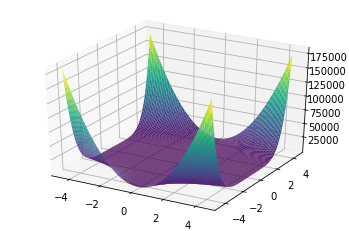

In [6]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z ,rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
plt.show()

### Constraints
If you see the beale function is continuous in every point, but we are not interested out of bounds. So we will implement a constraint which indicate if we are moving outside.

In [7]:
@checkargs
def is_outbounds(x : np.ndarray) -> bool:
    for i in range(len(x)):
        if -4.5>x[i] or x[i] > 4.5:
            return False
    #Important if you want to see the result.
    is_outbounds.__doc__="x1: -4.5 <= {:.2f} <= 4.5 \n x2: -4.5 <= {:.2f} <= 4.5".format(x[0],x[1])

    return True
constraints_ = [is_outbounds]

### Fixer function
This function help us to move the current invalid solution to valid region.

In [8]:
@checkargs
def setting(x : np.ndarray) -> np.ndarray:
    X_ = copy.deepcopy(x)
    
    for i in range(len(x)):
        if X_[i] < -4.5:
            X_[i] = -4.5
            
        elif X_[i] > 4.5:
            X_[i] = 4.5
            
    return X_


### Solver
In this section we create a solver instance for beale function. In addition, we have to overwrite the initializing_population which is the base of how to distribute our population.

In [9]:
class BealeSolver(EvolutiveProgramming):
    
    @checkargs
    def __init__(self, f_: function_type, constraints: list, fixer: function_type):
        super().__init__(f_,constraints,fixer)
    
    @checkargs
    def initializing_population(self, size_: tuple) -> np.ndarray:
        return np.random.uniform(-4.5,4.500001, size=size_)

In [10]:
Beale = BealeSolver(f, constraints_, setting)

When we create a solver instance, we have to call optimize function, which finds the best solution with the following parameters:
* generations: number of iterations.
* size_population: tuple with two integers (m,n)
  where m is the number generated of new solutions and 
  n is the number of variables about the problem.
* eps_std: avoid lower steps out of this bound.
* alpha: how increase the change in the neighborhood.

In [17]:
Beale.optimize(1000,(100,2),0.1, 2.0)

100%|██████████| 1000/1000 [00:05<00:00, 188.88it/s]


In [18]:
print(Beale)

Evolutive Programming search: 
 f(X) = 1.3228002104284747e-07 
 X = [3.00090923 0.50022339] 
 Constraints: 
 x1: -4.5 <= 3.0009092317027557 <= 4.5 
 x2: -4.5 <= 0.500223392796961 <= 4.5 



Now, we will check the algorithm's behavior, for this is necessary to evaluate the results for a specific number of runs. The Optimpy library has a function called **get_stats** (it is in **utils.helpers**), which returns a dictionary with some statistics of the runs. The parameters are:
* The solver.
* The number of iterations to evaluate model.
* The arguments, this should be a tuple.

In [19]:
args = (700, (60,2), 0.1, 0.3)
statistics = get_stats(Beale, 30, args)

100%|██████████| 700/700 [00:02<00:00, 300.21it/s]


In [20]:
pprint(statistics)

{'Best solution': {'f': 1.4992363195907e-08,
                   'x': array([3.00028641, 0.50006202])},
 'Mean': 1.1906238097035538e-06,
 'Standard deviation': 1.1637146585313092e-06,
 'Worst solution': {'f': 4.349108950832718e-06,
                    'x': array([2.99894656, 0.49931293])}}


## Ackley Function

\begin{equation}
  \min f(\vec{x}) = -20\exp \left( -0.2 \sqrt{\frac{1}{n} \sum_{i=1}^n x_i^2} \right) 
  - exp \left( \frac{1}{n} \sum_{i=1}^n \cos (2\pi x_i) \right)
  + 20 + e
\end{equation}


The global minimum is in $x^* = 0 $ and $f(\vec{x}) = 0$.

### Objective function

In [56]:
def f(x : np.ndarray):
    n = len(x)
    square_sum = (1/n)*np.sum(x * x)
    trigonometric_sum = (1/n)*np.sum(np.cos(2*np.pi*x))
 
    return -20*np.exp( -0.2 * np.sqrt(square_sum)) - np.exp(trigonometric_sum) + 20 + math.e
    

### Plot
In this part we will show you how looks the beale function.

In [53]:
# El código no funciona :c no sé porqué (después lo reviso)

### Constraints

In [57]:
@checkargs
def is_outbounds(x : np.ndarray) -> bool:
    str_ = ""
    valid = True
    for i in range(len(x)):
        if -30>x[i] or x[i] > 30:
            valid = False
        str_+= "x{}: -30 <= {:.2f} <= 30 \n ".format(i+1, x[i])
    
    #Important if you want to see the result.    
    is_outbounds.__doc__= str_
    
    return valid
constraints_ = [is_outbounds]

### Fixer function

In [58]:
@checkargs
def setting(x : np.ndarray) -> np.ndarray:
    X_ = copy.deepcopy(x)
    
    for i in range(len(x)):
        if X_[i] < -30:
            X_[i] = -30
            
        elif X_[i] > 30:
            X_[i] = 30
            
    return X_


### Solver

In [78]:
class AckleySolver(EvolutiveProgramming):
    
    @checkargs
    def __init__(self, f_: function_type, constraints: list, fixer: function_type):
        super().__init__(f_,constraints,fixer)
    
    @checkargs
    def initializing_population(self, size_: tuple) -> np.ndarray:
        return np.random.uniform(-30,30, size=size_)

In [79]:
Ackley = AckleySolver(f, constraints_, setting)

In [84]:
Ackley.optimize(500,(100,10),0.0001, 3.0)

100%|██████████| 500/500 [00:03<00:00, 154.23it/s]


In [85]:
print(Ackley)

Evolutive Programming search: 
 f(X) = 0.0021180144627881425 
 X = [-2.02500781e-04  4.56704917e-04  4.62462727e-04 -1.09635407e-03
 -5.54827706e-04 -6.78108602e-04  1.62737172e-04 -2.29385044e-04
 -3.61716197e-05 -5.01365846e-04] 
 Constraints: 
 x1: -30 <= -0.00 <= 30 
 x2: -30 <= 0.00 <= 30 
 x3: -30 <= 0.00 <= 30 
 x4: -30 <= -0.00 <= 30 
 x5: -30 <= -0.00 <= 30 
 x6: -30 <= -0.00 <= 30 
 x7: -30 <= 0.00 <= 30 
 x8: -30 <= -0.00 <= 30 
 x9: -30 <= -0.00 <= 30 
 x10: -30 <= -0.00 <= 30 
  



In [86]:
args = (500, (100,10), 0.0001, 3.0)
statistics = get_stats(Ackley, 30, args)

100%|██████████| 500/500 [00:03<00:00, 148.06it/s]


In [87]:
pprint(statistics)

{'Best solution': {'f': 0.000285411467406238,
                   'x': array([ 5.28448135e-05,  4.61400304e-05, -4.86329233e-05,  5.75518486e-05,
        3.67572882e-05, -4.52280011e-05, -8.46294512e-06, -4.85839463e-05,
       -1.32749821e-04, -1.29482631e-04])},
 'Mean': 1.3574516563582526,
 'Standard deviation': 3.3198837950664934,
 'Worst solution': {'f': 17.41745207831629,
                    'x': array([ 1.59924849e+01,  2.99853637e+00, -2.44659356e-05,  2.99866131e+00,
       -1.99892672e+00, -7.99622940e+00, -4.99773522e+00, -9.99496794e-01,
       -2.59876962e+01,  1.99900850e+00])}}
